In [2]:
# Complete WHO Standards-Based Data Generation Notebook - Realistic Health Data

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from scipy import stats

## WHO Growth Standards and Medical Guidelines

# WHO Growth Standards for HAZ (Height-for-Age Z-scores)
WHO_HAZ_STANDARDS = {
    'normal': {'mean': 0, 'std': 1},                    # Normal growth (HAZ >= -1)
    'mild_stunting': {'mean': -1.5, 'std': 0.3},       # Mild stunting (-2 < HAZ < -1)
    'moderate_stunting': {'mean': -2.5, 'std': 0.3},   # Moderate stunting (-3 < HAZ <= -2)
    'severe_stunting': {'mean': -3.5, 'std': 0.5}      # Severe stunting (HAZ <= -3)
}

# WHO Blood Pressure Classification (Adults) - mmHg
WHO_BP_STANDARDS = {
    'optimal': {'systolic': (90, 120), 'diastolic': (60, 80)},       # Optimal BP
    'normal': {'systolic': (120, 130), 'diastolic': (80, 85)},       # Normal BP
    'high_normal': {'systolic': (130, 140), 'diastolic': (85, 90)},  # High normal
    'stage1_htn': {'systolic': (140, 160), 'diastolic': (90, 100)},  # Stage 1 HTN
    'stage2_htn': {'systolic': (160, 180), 'diastolic': (100, 110)}, # Stage 2 HTN
    'stage3_htn': {'systolic': (180, 220), 'diastolic': (110, 130)}  # Stage 3 HTN (severe)
}

# WHO BMI Classification (Adults)
WHO_BMI_STANDARDS = {
    'severe_underweight': (12, 16),   # Severe underweight
    'underweight': (16, 18.5),        # Underweight
    'normal': (18.5, 25),             # Normal weight
    'overweight': (25, 30),           # Overweight
    'obese_class1': (30, 35),         # Obesity class I
    'obese_class2': (35, 40),         # Obesity class II
    'obese_class3': (40, 50)          # Obesity class III (morbid)
}

# WHO Hemoglobin Standards (children 6-59 months) - g/dL
WHO_HB_STANDARDS = {
    'severe_anemia': (7.0, 10.0),     # Severe anemia
    'moderate_anemia': (10.0, 11.0),  # Moderate anemia
    'mild_anemia': (11.0, 11.5),      # Mild anemia
    'normal': (11.5, 15.0)            # Normal hemoglobin
}

# WHO Weight-for-Height Standards (children)
WHO_WFH_STANDARDS = {
    'severe_wasting': {'mean': -3.0, 'std': 0.5},    # Severe acute malnutrition
    'moderate_wasting': {'mean': -2.5, 'std': 0.3},  # Moderate acute malnutrition
    'normal': {'mean': 0, 'std': 1},                 # Normal weight-for-height
    'overweight': {'mean': 2.0, 'std': 0.5}          # Overweight
}

# WHO Child Growth Velocity Standards (cm/month by age)
WHO_GROWTH_VELOCITY = {
    '0-6_months': {'height': 2.5, 'weight': 0.7},    # Rapid growth
    '6-12_months': {'height': 1.5, 'weight': 0.3},   # Moderate growth
    '12-24_months': {'height': 1.0, 'weight': 0.2},  # Steady growth
    '24-60_months': {'height': 0.6, 'weight': 0.15}  # Slower growth
}

# Indonesian Population Health Statistics (for realistic baseline)
INDONESIA_HEALTH_STATS = {
    'stunting_prevalence': 0.24,      # 24% stunting rate
    'hypertension_prevalence': 0.34,  # 34% hypertension rate (adults)
    'diabetes_prevalence': 0.06,      # 6% diabetes rate
    'smoking_prevalence': 0.28,       # 28% smoking rate (adults)
    'exclusive_breastfeeding': 0.52,  # 52% exclusive breastfeeding
    'clean_water_access': 0.73,       # 73% clean water access
    'sanitation_access': 0.68         # 68% sanitation access
}

print("🌍 Initializing WHO Standards-Based Data Generation with Realistic Indonesian Health Patterns...")

## Step 1: WHO Standards-Based Data Generation Functions

def generate_baseline_adults_who_standards(num_adults=50):
    """
    Generate realistic adult HTN data based on WHO standards and Indonesian epidemiology
    """
    adults_data = []
    
    for i in range(num_adults):
        person_id = f"P{i+1:03d}"
        household_id = f"HH{(i // 2) + 1:03d}"  # 2 adults per household on average
        
        # Age distribution (Indonesian adults with HTN - peaks at 45-65)
        age = np.random.choice(
            [35, 40, 45, 50, 55, 60, 65, 70, 75],
            p=[0.05, 0.10, 0.15, 0.20, 0.20, 0.15, 0.10, 0.03, 0.02]
        )
        
        # Sex distribution (slightly more females in Indonesian HTN population)
        sex = np.random.choice(['M', 'F'], p=[0.45, 0.55])
        
        # Age-adjusted BMI based on WHO standards
        if age < 45:
            bmi_category = np.random.choice(
                ['normal', 'overweight', 'obese_class1'], 
                p=[0.4, 0.4, 0.2]
            )
        else:
            bmi_category = np.random.choice(
                ['normal', 'overweight', 'obese_class1', 'obese_class2'], 
                p=[0.3, 0.4, 0.25, 0.05]
            )
        
        bmi_range = WHO_BMI_STANDARDS[bmi_category]
        bmi = np.random.uniform(bmi_range[0], bmi_range[1])
        
        # Blood pressure based on WHO classification and Indonesian prevalence
        # 34% hypertension prevalence means 66% normal/elevated
        bp_category = np.random.choice(
            ['optimal', 'normal', 'high_normal', 'stage1_htn', 'stage2_htn', 'stage3_htn'],
            p=[0.2, 0.25, 0.21, 0.20, 0.12, 0.02]  # Realistic Indonesian distribution
        )
        
        bp_ranges = WHO_BP_STANDARDS[bp_category]
        sistol = np.random.uniform(bp_ranges['systolic'][0], bp_ranges['systolic'][1])
        diastol = np.random.uniform(bp_ranges['diastolic'][0], bp_ranges['diastolic'][1])
        
        # Ensure diastolic is physiologically consistent with systolic
        if sistol > 160:
            diastol = max(diastol, 95)  # Severe HTN usually has elevated diastolic
        elif sistol < 120:
            diastol = min(diastol, 85)  # Normal systolic usually has normal diastolic
        
        # Comorbidities based on age and BMI
        diabetes_risk = 0.03 + (age - 35) * 0.002 + max(0, bmi - 25) * 0.01
        diabetes_koin = 1 if np.random.random() < diabetes_risk else 0
        
        smoking_risk = 0.4 if sex == 'M' else 0.1  # Higher male smoking rate
        perokok = 1 if np.random.random() < smoking_risk else 0
        
        # HTN diagnosis based on BP thresholds
        diagnosis_htn = 1 if sistol >= 140 or diastol >= 90 else 0
        
        # Program participation influenced by severity and age
        severe_htn = sistol >= 160 or diastol >= 100
        program_risk = 0.3 + (0.4 if severe_htn else 0) + (age - 35) * 0.01
        uptake_htn_program = 1 if np.random.random() < program_risk else 0
        
        # Adherence and medication
        if uptake_htn_program:
            adherence_htn = np.random.beta(8, 2)  # Skewed towards higher adherence
            
            # Medication choice based on age and comorbidities
            if diabetes_koin:
                jenis_obat = np.random.choice(['ACEi', 'ACEi+Diuretik'], p=[0.6, 0.4])
            elif age > 60:
                jenis_obat = np.random.choice(['Diuretik', 'CCB', 'ACEi'], p=[0.4, 0.35, 0.25])
            else:
                jenis_obat = np.random.choice(['ACEi', 'CCB', 'Diuretik'], p=[0.5, 0.3, 0.2])
        else:
            adherence_htn = 0
            jenis_obat = '-'
        
        adults_data.append({
            'person_id': person_id,
            'household_id': household_id,
            'usia': age,
            'sex': sex,
            'sistol': round(sistol, 1),
            'diastol': round(diastol, 1),
            'diagnosis_htn': diagnosis_htn,
            'diabetes_koin': diabetes_koin,
            'perokok': perokok,
            'BMI': round(bmi, 1),
            'uptake_htn_program': uptake_htn_program,
            'adherence_htn': round(adherence_htn, 2),
            'jenis_obat': jenis_obat
        })
    
    return pd.DataFrame(adults_data)

def generate_baseline_children_who_standards(num_children=40):
    """
    Generate realistic children stunting data based on WHO growth standards
    """
    children_data = []
    
    for i in range(num_children):
        child_id = f"C{i+1:03d}"
        household_id = f"HH{(i // 2) + 1:03d}"  # ~2 children per household
        
        # Age distribution (6-59 months, peak vulnerability at 12-24 months)
        usia_bulan = np.random.choice(
            [6, 9, 12, 15, 18, 21, 24, 30, 36, 42, 48, 54],
            p=[0.08, 0.08, 0.12, 0.15, 0.15, 0.12, 0.10, 0.08, 0.06, 0.03, 0.02, 0.01]
        )
        
        sex = np.random.choice(['M', 'F'], p=[0.52, 0.48])  # Slight male preference
        
        # HAZ based on WHO standards and Indonesian stunting prevalence (24%)
        haz_category = np.random.choice(
            ['normal', 'mild_stunting', 'moderate_stunting', 'severe_stunting'],
            p=[0.76, 0.12, 0.08, 0.04]  # 24% total stunting
        )
        
        haz_params = WHO_HAZ_STANDARDS[haz_category]
        HAZ = np.random.normal(haz_params['mean'], haz_params['std'])
        
        # Height and weight calculations based on HAZ and age
        # Using simplified growth charts approximations
        if sex == 'M':
            expected_height = 50 + (usia_bulan * 1.8)  # Rough male growth
            expected_weight = 3.5 + (usia_bulan * 0.25)
        else:
            expected_height = 49 + (usia_bulan * 1.7)  # Rough female growth
            expected_weight = 3.3 + (usia_bulan * 0.23)
        
        # Adjust for HAZ
        height_adjustment = HAZ * 2  # Each SD is ~2cm in early childhood
        TB = expected_height + height_adjustment
        
        # Weight adjusted for height
        weight_adjustment = HAZ * 0.3  # Weight follows height but less strictly
        BB = expected_weight + weight_adjustment + np.random.normal(0, 0.3)
        
        # Ensure physiological bounds
        TB = max(40, TB)  # Minimum height
        BB = max(2, BB)   # Minimum weight
        
        # WAZ and WHZ calculated from HAZ with correlation
        WAZ = HAZ + np.random.normal(0, 0.5)  # Correlated but not identical
        WHZ = np.random.normal(-0.2, 0.8)     # Independent wasting indicator
        
        # Hemoglobin based on WHO standards and nutritional status
        # Poorer HAZ correlates with lower Hb
        if HAZ < -2:  # Stunted children
            hb_category = np.random.choice(
                ['severe_anemia', 'moderate_anemia', 'mild_anemia', 'normal'],
                p=[0.15, 0.25, 0.35, 0.25]
            )
        else:  # Normal children
            hb_category = np.random.choice(
                ['moderate_anemia', 'mild_anemia', 'normal'],
                p=[0.1, 0.2, 0.7]
            )
        
        hb_range = WHO_HB_STANDARDS[hb_category]
        anemia_hb_gdl = np.random.uniform(hb_range[0], hb_range[1])
        
        # Environmental factors affecting growth
        # Access to clean water (73% in Indonesia)
        air_bersih = 1 if np.random.random() < INDONESIA_HEALTH_STATS['clean_water_access'] else 0
        
        # Sanitation access (68% in Indonesia)
        jamban_sehat = 1 if np.random.random() < INDONESIA_HEALTH_STATS['sanitation_access'] else 0
        
        # Exclusive breastfeeding (52% in Indonesia, higher for younger infants)
        if usia_bulan <= 6:
            bf_prob = INDONESIA_HEALTH_STATS['exclusive_breastfeeding']
        else:
            bf_prob = 0  # No longer exclusively breastfeeding
        ASI_eksklusif = 1 if np.random.random() < bf_prob else 0
        
        # Adequate complementary feeding (correlated with household education/income)
        mp_asi_memadai = 1 if np.random.random() < 0.6 else 0
        
        # Program participation (higher for stunted children)
        if HAZ < -2:
            program_prob = 0.6  # Higher participation for stunted
        elif HAZ < -1:
            program_prob = 0.4  # Moderate for at-risk
        else:
            program_prob = 0.2  # Lower for normal
        
        uptake_stunting_program = 1 if np.random.random() < program_prob else 0
        
        # PMT intensity and WASH costs if in program
        if uptake_stunting_program:
            intensitas_PMT_bln = np.random.choice([1, 2, 3], p=[0.3, 0.5, 0.2])
            biaya_WASH_bln = np.random.choice([0, 50000, 100000], p=[0.3, 0.5, 0.2])
        else:
            intensitas_PMT_bln = 0
            biaya_WASH_bln = 0
        
        children_data.append({
            'child_id': child_id,
            'household_id': household_id,
            'usia_bulan': usia_bulan,
            'sex': sex,
            'BB': round(BB, 1),
            'TB': round(TB, 1),
            'HAZ': round(HAZ, 2),
            'WAZ': round(WAZ, 2),
            'WHZ': round(WHZ, 2),
            'anemia_hb_gdl': round(anemia_hb_gdl, 1),
            'ASI_eksklusif': ASI_eksklusif,
            'mp_asi_memadai': mp_asi_memadai,
            'air_bersih': air_bersih,
            'jamban_sehat': jamban_sehat,
            'uptake_stunting_program': uptake_stunting_program,
            'intensitas_PMT_bln': intensitas_PMT_bln,
            'biaya_WASH_bln': biaya_WASH_bln
        })
    
    return pd.DataFrame(children_data)

def generate_realistic_households(num_households=25):
    """
    Generate realistic household data based on Indonesian demographics
    """
    households_data = []
    
    for i in range(num_households):
        household_id = f"HH{i+1:03d}"
        
        # Dusun (village area) assignment
        dusun = np.random.choice(['Dusun A', 'Dusun B', 'Dusun C', 'Dusun D'], 
                                p=[0.3, 0.25, 0.25, 0.2])
        
        # Household income (Indonesian rural distribution - log-normal)
        # Median around 3.5M, with realistic spread
        log_income = np.random.normal(np.log(3500000), 0.4)
        pendapatan_bulanan = np.exp(log_income)
        
        # Annual household income
        pendapatan_rt = pendapatan_bulanan * 12
        
        # Family size (2-7 members, modal at 4)
        jumlah_anggota = np.random.choice([2, 3, 4, 5, 6, 7], p=[0.1, 0.2, 0.35, 0.25, 0.08, 0.02])
        
        # Distance to health facility (0.5-10 km, most within 5 km)
        jarak_ke_puskesmas_km = np.random.exponential(2.5)
        jarak_ke_puskesmas_km = min(jarak_ke_puskesmas_km, 10)  # Cap at 10km
        
        # Infrastructure access based on income and location
        # House ownership (higher for higher income)
        income_quartile = 1 if pendapatan_rt < 30000000 else 2 if pendapatan_rt < 50000000 else 3
        own_house_prob = 0.5 + (income_quartile * 0.15)
        kepemilikan_rumah = 1 if np.random.random() < own_house_prob else 0
        
        # Electricity access (95% in rural Indonesia)
        akses_listrik = 1 if np.random.random() < 0.95 else 0
        
        # Internet access (correlated with income and education)
        internet_prob = min(0.8, 0.3 + (income_quartile * 0.2))
        akses_internet = 1 if np.random.random() < internet_prob else 0
        
        # Program participation tendency (household-level factor)
        # Influenced by income, education, distance
        distance_factor = max(0.2, 1 - jarak_ke_puskesmas_km * 0.05)
        income_factor = min(1, pendapatan_rt / 60000000)  # Normalize to 0-1
        program_tendency = (distance_factor * 0.4 + income_factor * 0.4 + 0.2) * np.random.uniform(0.7, 1.3)
        program_tendency = max(0.1, min(0.9, program_tendency))
        
        households_data.append({
            'household_id': household_id,
            'dusun': dusun,
            'pendapatan_bulanan': int(pendapatan_bulanan),
            'air_bersih': 1 if np.random.random() < INDONESIA_HEALTH_STATS['clean_water_access'] else 0,
            'jamban_sehat': 1 if np.random.random() < INDONESIA_HEALTH_STATS['sanitation_access'] else 0,
            'jarak_ke_puskesmas_km': round(jarak_ke_puskesmas_km, 1),
            'pendapatan_rt': int(pendapatan_rt),
            'jumlah_anggota': jumlah_anggota,
            'kepemilikan_rumah': kepemilikan_rumah,
            'akses_listrik': akses_listrik,
            'akses_internet': akses_internet,
            'program_tendency': round(program_tendency, 3)
        })
    
    return pd.DataFrame(households_data)

## Step 2: Load Original Datasets (as templates) or Generate New WHO-Based Data

print("📂 Loading Original Datasets as Templates or Creating New WHO-Based Data...")

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Try to load existing template datasets, otherwise create new ones
try:
    costs_catalog = pd.read_csv('COSTS_CATALOG.csv')
    print("✅ Costs catalog loaded successfully")
except FileNotFoundError:
    # Create a basic costs catalog if it doesn't exist
    costs_catalog = pd.DataFrame({
        'program': ['obat_htn', 'kontrol_htn', 'transport_htn', 'screening_htn', 
                   'PMT', 'mikronutrien', 'posyandu', 'WASH'],
        'biaya_unit': [50000, 300000, 120000, 30000, 45000, 20000, 10000, 15000]
    })
    costs_catalog.to_csv('COSTS_CATALOG.csv', index=False)
    print("✅ Created new costs catalog")

print(f"💰 Costs Catalog:")
display(costs_catalog)

# Generate completely new WHO-based datasets
print(f"\n🏗️ Generating New WHO Standards-Based Data...")

# Generate baseline datasets using WHO standards
households = generate_realistic_households(num_households=25)
adults_htn = generate_baseline_adults_who_standards(num_adults=50)
children_stunting = generate_baseline_children_who_standards(num_children=40)

print(f"✅ Generated New Data:")
print(f"   Households: {households.shape[0]} records")
print(f"   Adults HTN: {adults_htn.shape[0]} records")
print(f"   Children Stunting: {children_stunting.shape[0]} records")

# Display new data structure
print(f"\n📊 New Adults HTN Data (WHO Standards):")
display(adults_htn.head())

print(f"\n📊 New Children Stunting Data (WHO Standards):")
display(children_stunting.head())

print(f"\n🏠 New Households Data:")
display(households.head())

# Generate the final WHO-based datasets directly (no expansion needed)
print(f"\n✅ WHO Standards-Based Datasets:")
print(f"   Households: {len(households)} households")
print(f"   Adults HTN: {len(adults_htn)} participants")
print(f"   Children Stunting: {len(children_stunting)} participants")

# Export the WHO-based datasets with original filenames (replacing previous data)
households.to_csv('HOUSEHOLDS.csv', index=False)
adults_htn.to_csv('ADULTS_HTN.csv', index=False)
children_stunting.to_csv('CHILDREN_STUNTING.csv', index=False)
households.to_csv('households_expanded.csv', index=False)  # Also save as expanded for compatibility

print(f"\n💾 WHO-based datasets exported (replacing originals):")
print(f"   - HOUSEHOLDS.csv")
print(f"   - ADULTS_HTN.csv") 
print(f"   - CHILDREN_STUNTING.csv")
print(f"   - households_expanded.csv (compatibility)")

print(f"\n🎯 WHO STANDARDS COMPLIANCE:")
print(f"✅ Blood pressure based on WHO classifications")
print(f"✅ HAZ scores following WHO growth standards")
print(f"✅ BMI categories per WHO guidelines")
print(f"✅ Hemoglobin levels per WHO anemia thresholds")
print(f"✅ Indonesian epidemiological patterns")
print(f"✅ Realistic age-adjusted health outcomes")
print(f"✅ Evidence-based program participation rates")

## Step 3: Longitudinal Data Generation Functions

def generate_longitudinal_adults_htn(baseline_adults, n_months=36):
    """
    Generate realistic monthly HTN data for 3 years
    Based on clinical progression patterns and intervention effects
    """
    
    longitudinal_data = []
    base_date = datetime(2021, 1, 1)  # Start 3 years ago
    
    for _, person in baseline_adults.iterrows():
        person_id = person['person_id']
        
        # Extract baseline characteristics
        baseline_sbp = person['sistol']
        baseline_dbp = person['diastol']
        age = person['usia']
        sex = person['sex']
        has_diabetes = person['diabetes_koin']
        is_smoker = person['perokok']
        bmi = person['BMI']
        
        # Determine intervention timing (some start immediately, others delayed)
        intervention_start = random.randint(0, 6) if person['uptake_htn_program'] == 1 else 999
        
        # Individual progression parameters
        natural_progression = np.random.normal(0.3, 0.1)  # Natural BP increase per month
        seasonal_amplitude = np.random.normal(2, 0.5)     # Seasonal variation
        stress_factor = np.random.normal(1, 0.2)          # Individual stress response
        
        # Risk factors effect
        diabetes_effect = 1.2 if has_diabetes else 1.0
        smoking_effect = 1.15 if is_smoker else 1.0
        age_effect = 1 + (age - 45) * 0.01                # Older = worse control
        bmi_effect = 1 + max(0, bmi - 25) * 0.02          # Obesity effect
        
        combined_risk = diabetes_effect * smoking_effect * age_effect * bmi_effect
        
        for month in range(n_months + 1):  # Include baseline (month 0)
            current_date = base_date + timedelta(days=30 * month)
            
            # Seasonal effects (winter = higher BP)
            seasonal_effect = seasonal_amplitude * np.sin(2 * np.pi * (month - 3) / 12)
            
            # Natural progression without intervention
            natural_sbp = baseline_sbp + (natural_progression * month * combined_risk) + seasonal_effect
            natural_dbp = baseline_dbp + (natural_progression * 0.6 * month * combined_risk) + seasonal_effect * 0.5
            
            # Intervention effects
            if month >= intervention_start and person['uptake_htn_program'] == 1:
                months_on_treatment = month - intervention_start
                
                # Adherence varies over time (starts high, may decline)
                base_adherence = person['adherence_htn']
                adherence_decay = np.random.normal(0.95, 0.05)  # Monthly decay factor
                current_adherence = base_adherence * (adherence_decay ** months_on_treatment)
                current_adherence = max(0.1, min(1.0, current_adherence))  # Keep in bounds
                
                # Treatment efficacy (diminishing returns)
                treatment_efficacy = current_adherence * (1 - 0.5 * np.exp(-months_on_treatment / 6))
                
                # Drug-specific effects
                if person['jenis_obat'] == 'ACEi':
                    sbp_reduction = 12 * treatment_efficacy
                    dbp_reduction = 8 * treatment_efficacy
                elif person['jenis_obat'] == 'CCB':
                    sbp_reduction = 10 * treatment_efficacy  
                    dbp_reduction = 6 * treatment_efficacy
                elif person['jenis_obat'] == 'Diuretik':
                    sbp_reduction = 8 * treatment_efficacy
                    dbp_reduction = 5 * treatment_efficacy
                elif person['jenis_obat'] == 'ACEi+Diuretik':
                    sbp_reduction = 18 * treatment_efficacy
                    dbp_reduction = 12 * treatment_efficacy
                else:
                    sbp_reduction = 0
                    dbp_reduction = 0
                
                # Apply treatment effect
                current_sbp = natural_sbp - sbp_reduction
                current_dbp = natural_dbp - dbp_reduction
                
                # Add medication side effects (rare but realistic)
                if random.random() < 0.02:  # 2% chance per month
                    medication_side_effect = np.random.normal(5, 2)  # Temporary BP increase
                    current_sbp += medication_side_effect
                    current_dbp += medication_side_effect * 0.6
            else:
                current_sbp = natural_sbp
                current_dbp = natural_dbp
                current_adherence = 0
            
            # Add random noise (measurement error, daily variation)
            noise_sbp = np.random.normal(0, 3)
            noise_dbp = np.random.normal(0, 2)
            
            final_sbp = max(90, current_sbp + noise_sbp)  # Physiological bounds
            final_dbp = max(60, min(120, current_dbp + noise_dbp))
            
            # Calculate cardiovascular events (rare but realistic)
            # Higher risk with higher BP, age, diabetes, smoking
            cv_risk_score = (
                (final_sbp - 120) * 0.001 +
                (age - 40) * 0.0005 +
                has_diabetes * 0.002 +
                is_smoker * 0.001
            )
            cv_event = 1 if random.random() < cv_risk_score * 0.01 else 0  # Very low probability
            
            longitudinal_data.append({
                'person_id': person_id,
                'household_id': person['household_id'],
                'date': current_date,
                'month': month,
                'age': age + month/12,
                'sex': sex,
                'sistol': round(final_sbp, 1),
                'diastol': round(final_dbp, 1),
                'diagnosis_htn': 1 if final_sbp >= 140 or final_dbp >= 90 else 0,
                'diabetes_koin': has_diabetes,
                'perokok': is_smoker,
                'BMI': bmi + np.random.normal(0, 0.1),  # Small BMI changes
                'on_treatment': 1 if month >= intervention_start and person['uptake_htn_program'] == 1 else 0,
                'adherence_current': round(current_adherence, 2) if month >= intervention_start else 0,
                'jenis_obat': person['jenis_obat'] if month >= intervention_start and person['uptake_htn_program'] == 1 else '-',
                'cv_event': cv_event,
                'seasonal_factor': round(seasonal_effect, 1),
                'treatment_months': max(0, month - intervention_start) if intervention_start < 999 else 0
            })
    
    return pd.DataFrame(longitudinal_data)

def generate_longitudinal_children_stunting(baseline_children, max_age_months=50):
    """
    Generate realistic monthly growth data until 50 months
    Based on child growth patterns and intervention effects
    """
    
    longitudinal_data = []
    base_date = datetime(2021, 1, 1)
    
    for _, child in baseline_children.iterrows():
        child_id = child['child_id']
        baseline_age = child['usia_bulan']
        baseline_haz = child['HAZ']
        baseline_weight = child['BB']
        baseline_height = child['TB']
        
        # Stop when child reaches max_age_months
        months_to_generate = min(max_age_months - baseline_age, 36)
        if months_to_generate <= 0:
            continue
            
        # Growth parameters
        sex = child['sex']
        has_exclusive_bf = child['ASI_eksklusif']
        adequate_complementary = child['mp_asi_memadai']
        baseline_hb = child['anemia_hb_gdl']
        has_clean_water = child['air_bersih']
        has_sanitation = child['jamban_sehat']
        
        # Determine intervention timing
        intervention_start = random.randint(0, 3) if child['uptake_stunting_program'] == 1 else 999
        
        # Individual growth parameters
        genetic_potential = np.random.normal(0, 0.2)  # Individual genetic variation
        catch_up_potential = max(0, -baseline_haz * 0.3)  # Stunted children can catch up
        
        # Environmental risk factors
        water_sanitation_effect = 1.2 if (has_clean_water and has_sanitation) else 0.8
        breastfeeding_effect = 1.3 if has_exclusive_bf else 1.0
        complementary_effect = 1.1 if adequate_complementary else 0.9
        
        environmental_multiplier = water_sanitation_effect * breastfeeding_effect * complementary_effect
        
        for month in range(int(months_to_generate) + 1):
            current_date = base_date + timedelta(days=30 * month)
            current_age_months = baseline_age + month
            
            # Age-specific growth velocity (faster in early months)
            if current_age_months < 6:
                base_growth_velocity = 0.15  # Rapid early growth
            elif current_age_months < 12:
                base_growth_velocity = 0.08
            elif current_age_months < 24:
                base_growth_velocity = 0.05
            else:
                base_growth_velocity = 0.03  # Slower after 2 years
            
            # Seasonal effects (malnutrition seasons)
            seasonal_nutrition = 0.1 * np.sin(2 * np.pi * (month - 9) / 12)  # Worse during dry season
            
            # Natural growth without intervention
            natural_haz_change = (
                base_growth_velocity * environmental_multiplier + 
                genetic_potential * 0.1 + 
                catch_up_potential * 0.1 +
                seasonal_nutrition
            )
            
            # Intervention effects
            if month >= intervention_start and child['uptake_stunting_program'] == 1:
                months_on_program = month - intervention_start
                
                # Program effectiveness (builds up over time)
                program_effectiveness = 1 - np.exp(-months_on_program / 6)  # Asymptotic improvement
                
                # PMT effectiveness
                pmt_intensity = child['intensitas_PMT_bln'] / 2  # Scale 0-1
                pmt_effect = 0.2 * pmt_intensity * program_effectiveness
                
                # Micronutrient effect  
                micronutrient_effect = 0.1 * program_effectiveness
                
                # WASH intervention effect
                wash_effect = 0.05 * program_effectiveness if child['biaya_WASH_bln'] > 0 else 0
                
                total_intervention_effect = pmt_effect + micronutrient_effect + wash_effect
                
                haz_change_this_month = natural_haz_change + total_intervention_effect
            else:
                haz_change_this_month = natural_haz_change
            
            # Add random noise and illness effects
            illness_effect = -0.1 if random.random() < 0.05 else 0  # 5% chance of illness setback
            noise = np.random.normal(0, 0.05)
            
            total_haz_change = haz_change_this_month + illness_effect + noise
            
            # Calculate cumulative HAZ
            if month == 0:
                current_haz = baseline_haz
                current_weight = baseline_weight  
                current_height = baseline_height
            else:
                current_haz = previous_haz + total_haz_change
                # Approximate weight and height based on HAZ changes
                current_height = previous_height + np.random.normal(1.2, 0.3)  # Monthly height gain
                current_weight = previous_weight + np.random.normal(0.3, 0.1)  # Monthly weight gain
            
            # Calculate other anthropometric indices
            # Simplified WAZ and WHZ based on HAZ changes  
            current_waz = current_haz + np.random.normal(0, 0.3)
            current_whz = np.random.normal(-0.5, 0.5)
            
            # Hemoglobin changes with nutrition status
            hb_change = total_haz_change * 2  # HAZ improvement often correlates with Hb
            current_hb = max(7, min(15, baseline_hb + hb_change * month + np.random.normal(0, 0.2)))
            
            # Diarrhea risk (higher with poor HAZ)
            diarrhea_risk = max(0.01, 0.1 + current_haz * -0.05)  # Worse HAZ = more diarrhea
            diarrhea_this_month = 1 if random.random() < diarrhea_risk else 0
            
            longitudinal_data.append({
                'child_id': child_id,
                'household_id': child['household_id'],
                'date': current_date,
                'month': month,
                'usia_bulan': current_age_months,
                'sex': sex,
                'BB': round(current_weight, 1),
                'TB': round(current_height, 1),
                'HAZ': round(current_haz, 2),
                'WAZ': round(current_waz, 2),
                'WHZ': round(current_whz, 2),
                'anemia_hb_gdl': round(current_hb, 1),
                'ASI_eksklusif': has_exclusive_bf if current_age_months < 6 else 0,
                'mp_asi_memadai': adequate_complementary,
                'air_bersih': has_clean_water,
                'jamban_sehat': has_sanitation,
                'diare_bulan_ini': diarrhea_this_month,
                'on_program': 1 if month >= intervention_start and child['uptake_stunting_program'] == 1 else 0,
                'program_months': max(0, month - intervention_start) if intervention_start < 999 else 0,
                'seasonal_nutrition': round(seasonal_nutrition, 2),
                'haz_change_this_month': round(total_haz_change, 3)
            })
            
            # Store for next iteration
            previous_haz = current_haz
            previous_weight = current_weight
            previous_height = current_height
    
    return pd.DataFrame(longitudinal_data)

def generate_program_log_longitudinal_corrected(adults_longitudinal, children_longitudinal, costs_catalog):
    """
    Generate realistic program delivery log based on longitudinal data
    Uses actual costs from COSTS_CATALOG.csv
    """
    
    print("🔄 Generating program log with EXACT costs from catalog...")
    
    # Load cost catalog into dictionary for easy lookup
    cost_dict = costs_catalog.set_index('program')['biaya_unit'].to_dict()
    print(f"📋 Using costs: {cost_dict}")
    
    program_log = []
    log_id = 1
    
    # HTN program logs
    print("💊 Processing HTN program costs...")
    for _, row in adults_longitudinal.iterrows():
        if row['on_treatment'] == 1:
            date = row['date']
            person_id = row['person_id']
            
            # Monthly medication costs (EXACT catalog cost: 50,000)
            medication_cost = cost_dict.get('obat_htn', 50000)
            program_log.append({
                'id': log_id,
                'target_id': person_id,
                'program': 'obat_htn',
                'tanggal': date,
                'unit_terkirim': 1,
                'biaya_riil': medication_cost + np.random.randint(-2500, 2500)  # Small realistic variation
            })
            log_id += 1
            
            # Quarterly control visits (300,000/year = 75,000/quarter)
            if row['month'] % 3 == 0 and row['treatment_months'] > 0:
                control_cost = cost_dict.get('kontrol_htn', 300000) / 4  # Quarterly portion
                program_log.append({
                    'id': log_id,
                    'target_id': person_id,
                    'program': 'kontrol_htn',
                    'tanggal': date,
                    'unit_terkirim': 1,
                    'biaya_riil': control_cost + np.random.randint(-5000, 5000)
                })
                log_id += 1
            
            # Monthly transport costs (120,000/year = 10,000/month)
            transport_cost = cost_dict.get('transport_htn', 120000) / 12  # Monthly portion
            program_log.append({
                'id': log_id,
                'target_id': person_id,
                'program': 'transport_htn',
                'tanggal': date,
                'unit_terkirim': 1,
                'biaya_riil': transport_cost + np.random.randint(-1000, 1000)
            })
            log_id += 1
            
            # Initial screening (only once, at start of treatment)
            if row['treatment_months'] == 1:  # First month of treatment
                screening_cost = cost_dict.get('screening_htn', 30000)
                program_log.append({
                    'id': log_id,
                    'target_id': person_id,
                    'program': 'screening_htn',
                    'tanggal': date,
                    'unit_terkirim': 1,
                    'biaya_riil': screening_cost + np.random.randint(-2000, 2000)
                })
                log_id += 1
    
    # Stunting program logs
    print("👶 Processing Stunting program costs...")
    for _, row in children_longitudinal.iterrows():
        if row['on_program'] == 1:
            date = row['date']
            child_id = row['child_id']
            household_id = row['household_id']
            
            # Monthly PMT (EXACT: 45,000 per packet, 2 packets per month = 90,000)
            pmt_cost = cost_dict.get('PMT', 45000)
            program_log.append({
                'id': log_id,
                'target_id': child_id,
                'program': 'PMT',
                'tanggal': date,
                'unit_terkirim': 2,  # 2 packets per month
                'biaya_riil': pmt_cost * 2 + np.random.randint(-2000, 2000)
            })
            log_id += 1
            
            # Monthly micronutrients (EXACT: 20,000)
            micronutrient_cost = cost_dict.get('mikronutrien', 20000)
            program_log.append({
                'id': log_id,
                'target_id': child_id,
                'program': 'mikronutrien',
                'tanggal': date,
                'unit_terkirim': 1,
                'biaya_riil': micronutrient_cost + np.random.randint(-1000, 1000)
            })
            log_id += 1
            
            # Monthly posyandu visits (EXACT: 10,000)
            posyandu_cost = cost_dict.get('posyandu', 10000)
            program_log.append({
                'id': log_id,
                'target_id': child_id,
                'program': 'posyandu',
                'tanggal': date,
                'unit_terkirim': 1,
                'biaya_riil': posyandu_cost + np.random.randint(-500, 500)
            })
            log_id += 1
    
    # WASH program (household-level, monthly) (EXACT: 15,000)
    print("🚿 Processing WASH program costs...")
    participating_households = children_longitudinal[
        children_longitudinal['on_program'] == 1
    ]['household_id'].unique()
    
    for household_id in participating_households:
        household_children = children_longitudinal[
            (children_longitudinal['household_id'] == household_id) & 
            (children_longitudinal['on_program'] == 1)
        ]
        
        unique_months = household_children[['date', 'month']].drop_duplicates()
        
        for _, month_data in unique_months.iterrows():
            wash_cost = cost_dict.get('WASH', 15000)  # EXACT catalog cost
            program_log.append({
                'id': log_id,
                'target_id': household_id,
                'program': 'WASH',
                'tanggal': month_data['date'],
                'unit_terkirim': 1,  # Per household per month
                'biaya_riil': wash_cost + np.random.randint(-1000, 1000)
            })
            log_id += 1
    
    result_df = pd.DataFrame(program_log)
    
    print(f"✅ Program log generated with {len(result_df):,} records")
    return result_df

## Step 4: Generate Longitudinal Data

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("🔄 Generating Longitudinal Data for Predictive Modeling...")

# Generate longitudinal data using baseline datasets
adults_longitudinal = generate_longitudinal_adults_htn(adults_htn, n_months=36)
children_longitudinal = generate_longitudinal_children_stunting(children_stunting, max_age_months=50)

# Generate program log with corrected costs using the cost catalog
program_log_corrected = generate_program_log_longitudinal_corrected(
    adults_longitudinal, children_longitudinal, costs_catalog
)

print(f"✅ Generated Datasets:")
print(f"   Adults HTN Longitudinal: {adults_longitudinal.shape[0]:,} records")
print(f"   Children Stunting Longitudinal: {children_longitudinal.shape[0]:,} records")
print(f"   Program Log Corrected: {program_log_corrected.shape[0]:,} records")

print(f"\n💰 FINAL COST VERIFICATION:")
cost_breakdown = program_log_corrected.groupby('program').agg({
    'biaya_riil': ['sum', 'mean', 'count']
}).round(0)

print(f"\nCOST BREAKDOWN BY PROGRAM:")
for program in cost_breakdown.index:
    total_cost = cost_breakdown.loc[program, ('biaya_riil', 'sum')]
    avg_cost = cost_breakdown.loc[program, ('biaya_riil', 'mean')]
    count = cost_breakdown.loc[program, ('biaya_riil', 'count')]
    catalog_cost = costs_catalog[costs_catalog['program'] == program]['biaya_unit'].iloc[0] if program in costs_catalog['program'].values else 'N/A'
    print(f"   {program}: Avg Rp {avg_cost:,.0f} (Catalog: Rp {catalog_cost:,}), Total: Rp {total_cost:,.0f}, Records: {count:,.0f}")

# Display sample data
print(f"\n📊 SAMPLE LONGITUDINAL DATA:")
print(f"\nAdults HTN (First 10 records for Person P001):")
display(adults_longitudinal[adults_longitudinal['person_id'] == 'P001'].head(10))

print(f"\nChildren Stunting (First 10 records for Child C001):")
display(children_longitudinal[children_longitudinal['child_id'] == 'C001'].head(10))

print(f"\nProgram Log Sample:")
display(program_log_corrected.head(10))

# Export the longitudinal datasets
adults_longitudinal.to_csv('adults_htn_longitudinal.csv', index=False)
children_longitudinal.to_csv('children_stunting_longitudinal.csv', index=False)
program_log_corrected.to_csv('program_log_longitudinal_corrected.csv', index=False)

print(f"\n💾 Datasets exported:")
print(f"   - adults_htn_longitudinal.csv")
print(f"   - children_stunting_longitudinal.csv") 
print(f"   - program_log_longitudinal_corrected.csv")

print(f"\n🎯 WHAT THIS ENABLES:")
print(f"1. 📈 Time-series forecasting models")
print(f"2. 🔮 Predictive health outcome modeling")
print(f"3. 📊 Treatment response prediction")
print(f"4. 💊 Intervention timing optimization")
print(f"5. 🎯 Risk stratification algorithms")
print(f"6. 💰 Cost-effectiveness over time")

print(f"\n📋 DATA CHARACTERISTICS:")
print(f"✅ Realistic clinical progressions")
print(f"✅ Seasonal and environmental effects")
print(f"✅ Treatment adherence decay")
print(f"✅ Individual variation patterns")
print(f"✅ Intervention timing effects")
print(f"✅ Catch-up growth for children")
print(f"✅ Age-appropriate development")
print(f"✅ EXACT cost catalog alignment")

🌍 Initializing WHO Standards-Based Data Generation with Realistic Indonesian Health Patterns...
📂 Loading Original Datasets as Templates or Creating New WHO-Based Data...
✅ Costs catalog loaded successfully
💰 Costs Catalog:


,program,biaya_unit,unit_def
0,screening_htn,30000,per screening sekali
1,obat_htn,50000,per bulan per orang (rata-rata)
2,kontrol_htn,300000,per tahun per orang (kunjungan & pemeriksaan)
3,transport_htn,120000,per tahun per orang (rata-rata)
4,PMT,45000,per paket per bulan per anak
5,mikronutrien,20000,per bulan per anak
6,WASH,15000,per bulan per keluarga (operasional)
7,posyandu,10000,per kunjungan per anak



🏗️ Generating New WHO Standards-Based Data...
✅ Generated New Data:
   Households: 25 records
   Adults HTN: 50 records
   Children Stunting: 40 records

📊 New Adults HTN Data (WHO Standards):


,person_id,household_id,usia,sex,sistol,diastol,diagnosis_htn,diabetes_koin,perokok,BMI,uptake_htn_program,adherence_htn,jenis_obat
0,P001,HH001,55,F,108.5,79.8,0,0,0,27.9,0,0.00,-
1,P002,HH001,60,F,128.1,84.1,0,0,0,31.8,1,0.80,CCB
2,P003,HH002,65,M,130.4,87.3,0,0,1,25.5,1,0.94,ACEi
3,P004,HH002,45,F,135.4,88.2,0,0,0,18.8,0,0.00,-
4,P005,HH003,50,F,90.8,79.3,0,0,0,21.4,1,0.86,CCB



📊 New Children Stunting Data (WHO Standards):


,child_id,household_id,usia_bulan,sex,BB,TB,HAZ,WAZ,WHZ,anemia_hb_gdl,ASI_eksklusif,mp_asi_memadai,air_bersih,jamban_sehat,uptake_stunting_program,intensitas_PMT_bln,biaya_WASH_bln
0,C001,HH001,6,M,4.6,60.7,-0.03,0.34,-0.06,13.3,1,0,1,1,1,2,0
1,C002,HH001,18,F,7.1,76.5,-1.56,-1.06,1.13,11.5,0,1,1,1,1,2,0
2,C003,HH002,21,M,8.8,89.8,1.01,0.34,-0.98,13.2,0,1,1,0,1,1,50000
3,C004,HH002,6,M,5.7,62.9,1.05,0.70,-0.23,13.0,0,0,1,0,0,0,0
4,C005,HH003,21,M,9.3,91.3,1.77,2.08,-0.06,14.1,0,0,0,1,0,0,0



🏠 New Households Data:


,household_id,dusun,pendapatan_bulanan,air_bersih,jamban_sehat,jarak_ke_puskesmas_km,pendapatan_rt,jumlah_anggota,kepemilikan_rumah,akses_listrik,akses_internet,program_tendency
0,HH001,Dusun B,2243441,0,0,0.1,26921293,3,0,1,0,0.553
1,HH002,Dusun A,3976189,1,1,0.5,47714268,3,1,1,1,0.794
2,HH003,Dusun A,2641707,1,1,0.6,31700488,5,1,1,1,0.852
3,HH004,Dusun D,1487229,1,1,4.1,17846748,6,1,1,0,0.614
4,HH005,Dusun A,3193069,0,0,0.9,38316838,5,1,1,1,0.900



✅ WHO Standards-Based Datasets:
   Households: 25 households
   Adults HTN: 50 participants
   Children Stunting: 40 participants

💾 WHO-based datasets exported (replacing originals):
   - HOUSEHOLDS.csv
   - ADULTS_HTN.csv
   - CHILDREN_STUNTING.csv
   - households_expanded.csv (compatibility)

🎯 WHO STANDARDS COMPLIANCE:
✅ Blood pressure based on WHO classifications
✅ HAZ scores following WHO growth standards
✅ BMI categories per WHO guidelines
✅ Hemoglobin levels per WHO anemia thresholds
✅ Indonesian epidemiological patterns
✅ Realistic age-adjusted health outcomes
✅ Evidence-based program participation rates
🔄 Generating Longitudinal Data for Predictive Modeling...
🔄 Generating program log with EXACT costs from catalog...
📋 Using costs: {'screening_htn': 30000, 'obat_htn': 50000, 'kontrol_htn': 300000, 'transport_htn': 120000, 'PMT': 45000, 'mikronutrien': 20000, 'WASH': 15000, 'posyandu': 10000}
💊 Processing HTN program costs...
👶 Processing Stunting program costs...
🚿 Processin

,person_id,household_id,date,month,age,sex,sistol,diastol,diagnosis_htn,diabetes_koin,perokok,BMI,on_treatment,adherence_current,jenis_obat,cv_event,seasonal_factor,treatment_months
0,P001,HH001,2021-01-01,0,55.000000,F,111.1,78.4,0,0,0,27.876586,0,0.0,-,0,-1.9,0
1,P001,HH001,2021-01-31,1,55.083333,F,112.0,80.7,0,0,0,27.853053,0,0.0,-,0,-1.7,0
2,P001,HH001,2021-03-02,2,55.166667,F,110.0,78.9,0,0,0,27.853427,0,0.0,-,0,-1.0,0
3,P001,HH001,2021-04-01,3,55.250000,F,110.4,76.7,0,0,0,27.727508,0,0.0,-,0,0.0,0
4,P001,HH001,2021-05-01,4,55.333333,F,109.4,79.2,0,0,0,27.931425,0,0.0,-,0,1.0,0
5,P001,HH001,2021-05-31,5,55.416667,F,109.5,79.0,0,0,0,28.046565,0,0.0,-,0,1.7,0
6,P001,HH001,2021-06-30,6,55.500000,F,112.2,82.4,0,0,0,27.757525,0,0.0,-,0,1.9,0
7,P001,HH001,2021-07-30,7,55.583333,F,111.4,82.6,0,0,0,27.784901,0,0.0,-,0,1.7,0
8,P001,HH001,2021-08-29,8,55.666667,F,113.8,81.0,0,0,0,27.870831,0,0.0,-,0,1.0,0
9,P001,HH001,2021-09-28,9,55.750000,F,110.4,85.7,0,0,0,27.898650,0,0.0,-,0,0.0,0



Children Stunting (First 10 records for Child C001):


,child_id,household_id,date,month,usia_bulan,sex,BB,TB,HAZ,WAZ,...,anemia_hb_gdl,ASI_eksklusif,mp_asi_memadai,air_bersih,jamban_sehat,diare_bulan_ini,on_program,program_months,seasonal_nutrition,haz_change_this_month
0,C001,HH001,2021-01-01,0,6,M,4.6,60.7,-0.03,0.18,...,13.2,0,0,1,1,0,0,0,0.10,0.228
1,C001,HH001,2021-01-31,1,7,M,5.0,61.9,0.18,0.42,...,13.5,0,0,1,1,0,1,0,0.09,0.214
2,C001,HH001,2021-03-02,2,8,M,5.3,63.0,0.36,0.44,...,14.0,0,0,1,1,0,1,1,0.05,0.172
3,C001,HH001,2021-04-01,3,9,M,5.5,64.2,0.55,0.27,...,14.3,0,0,1,1,0,1,2,-0.00,0.195
4,C001,HH001,2021-05-01,4,10,M,5.8,65.2,0.75,0.89,...,14.7,0,0,1,1,0,1,3,-0.05,0.201
5,C001,HH001,2021-05-31,5,11,M,6.0,66.7,0.97,0.72,...,15.0,0,0,1,1,0,1,4,-0.09,0.218
6,C001,HH001,2021-06-30,6,12,M,6.2,67.5,1.00,0.65,...,13.6,0,0,1,1,0,1,5,-0.10,0.025
7,C001,HH001,2021-07-30,7,13,M,6.7,68.6,1.24,1.67,...,15.0,0,0,1,1,0,1,6,-0.09,0.243
8,C001,HH001,2021-08-29,8,14,M,7.1,70.0,1.36,1.34,...,15.0,0,0,1,1,0,1,7,-0.05,0.125
9,C001,HH001,2021-09-28,9,15,M,7.4,71.5,1.68,0.93,...,15.0,0,0,1,1,0,1,8,0.00,0.316



Program Log Sample:


,id,target_id,program,tanggal,unit_terkirim,biaya_riil
0,1,P002,obat_htn,2021-05-01,1,52375.0
1,2,P002,transport_htn,2021-05-01,1,9836.0
2,3,P002,obat_htn,2021-05-31,1,50057.0
3,4,P002,transport_htn,2021-05-31,1,10096.0
4,5,P002,screening_htn,2021-05-31,1,30859.0
5,6,P002,obat_htn,2021-06-30,1,51860.0
6,7,P002,kontrol_htn,2021-06-30,1,75312.0
7,8,P002,transport_htn,2021-06-30,1,10397.0
8,9,P002,obat_htn,2021-07-30,1,51322.0
9,10,P002,transport_htn,2021-07-30,1,9009.0



💾 Datasets exported:
   - adults_htn_longitudinal.csv
   - children_stunting_longitudinal.csv
   - program_log_longitudinal_corrected.csv

🎯 WHAT THIS ENABLES:
1. 📈 Time-series forecasting models
2. 🔮 Predictive health outcome modeling
3. 📊 Treatment response prediction
4. 💊 Intervention timing optimization
5. 🎯 Risk stratification algorithms
6. 💰 Cost-effectiveness over time

📋 DATA CHARACTERISTICS:
✅ Realistic clinical progressions
✅ Seasonal and environmental effects
✅ Treatment adherence decay
✅ Individual variation patterns
✅ Intervention timing effects
✅ Catch-up growth for children
✅ Age-appropriate development
✅ EXACT cost catalog alignment


📊 Creating Comprehensive Visualizations for Longitudinal Data...


/tmp/ipykernel_19405/1766392905.py:171: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



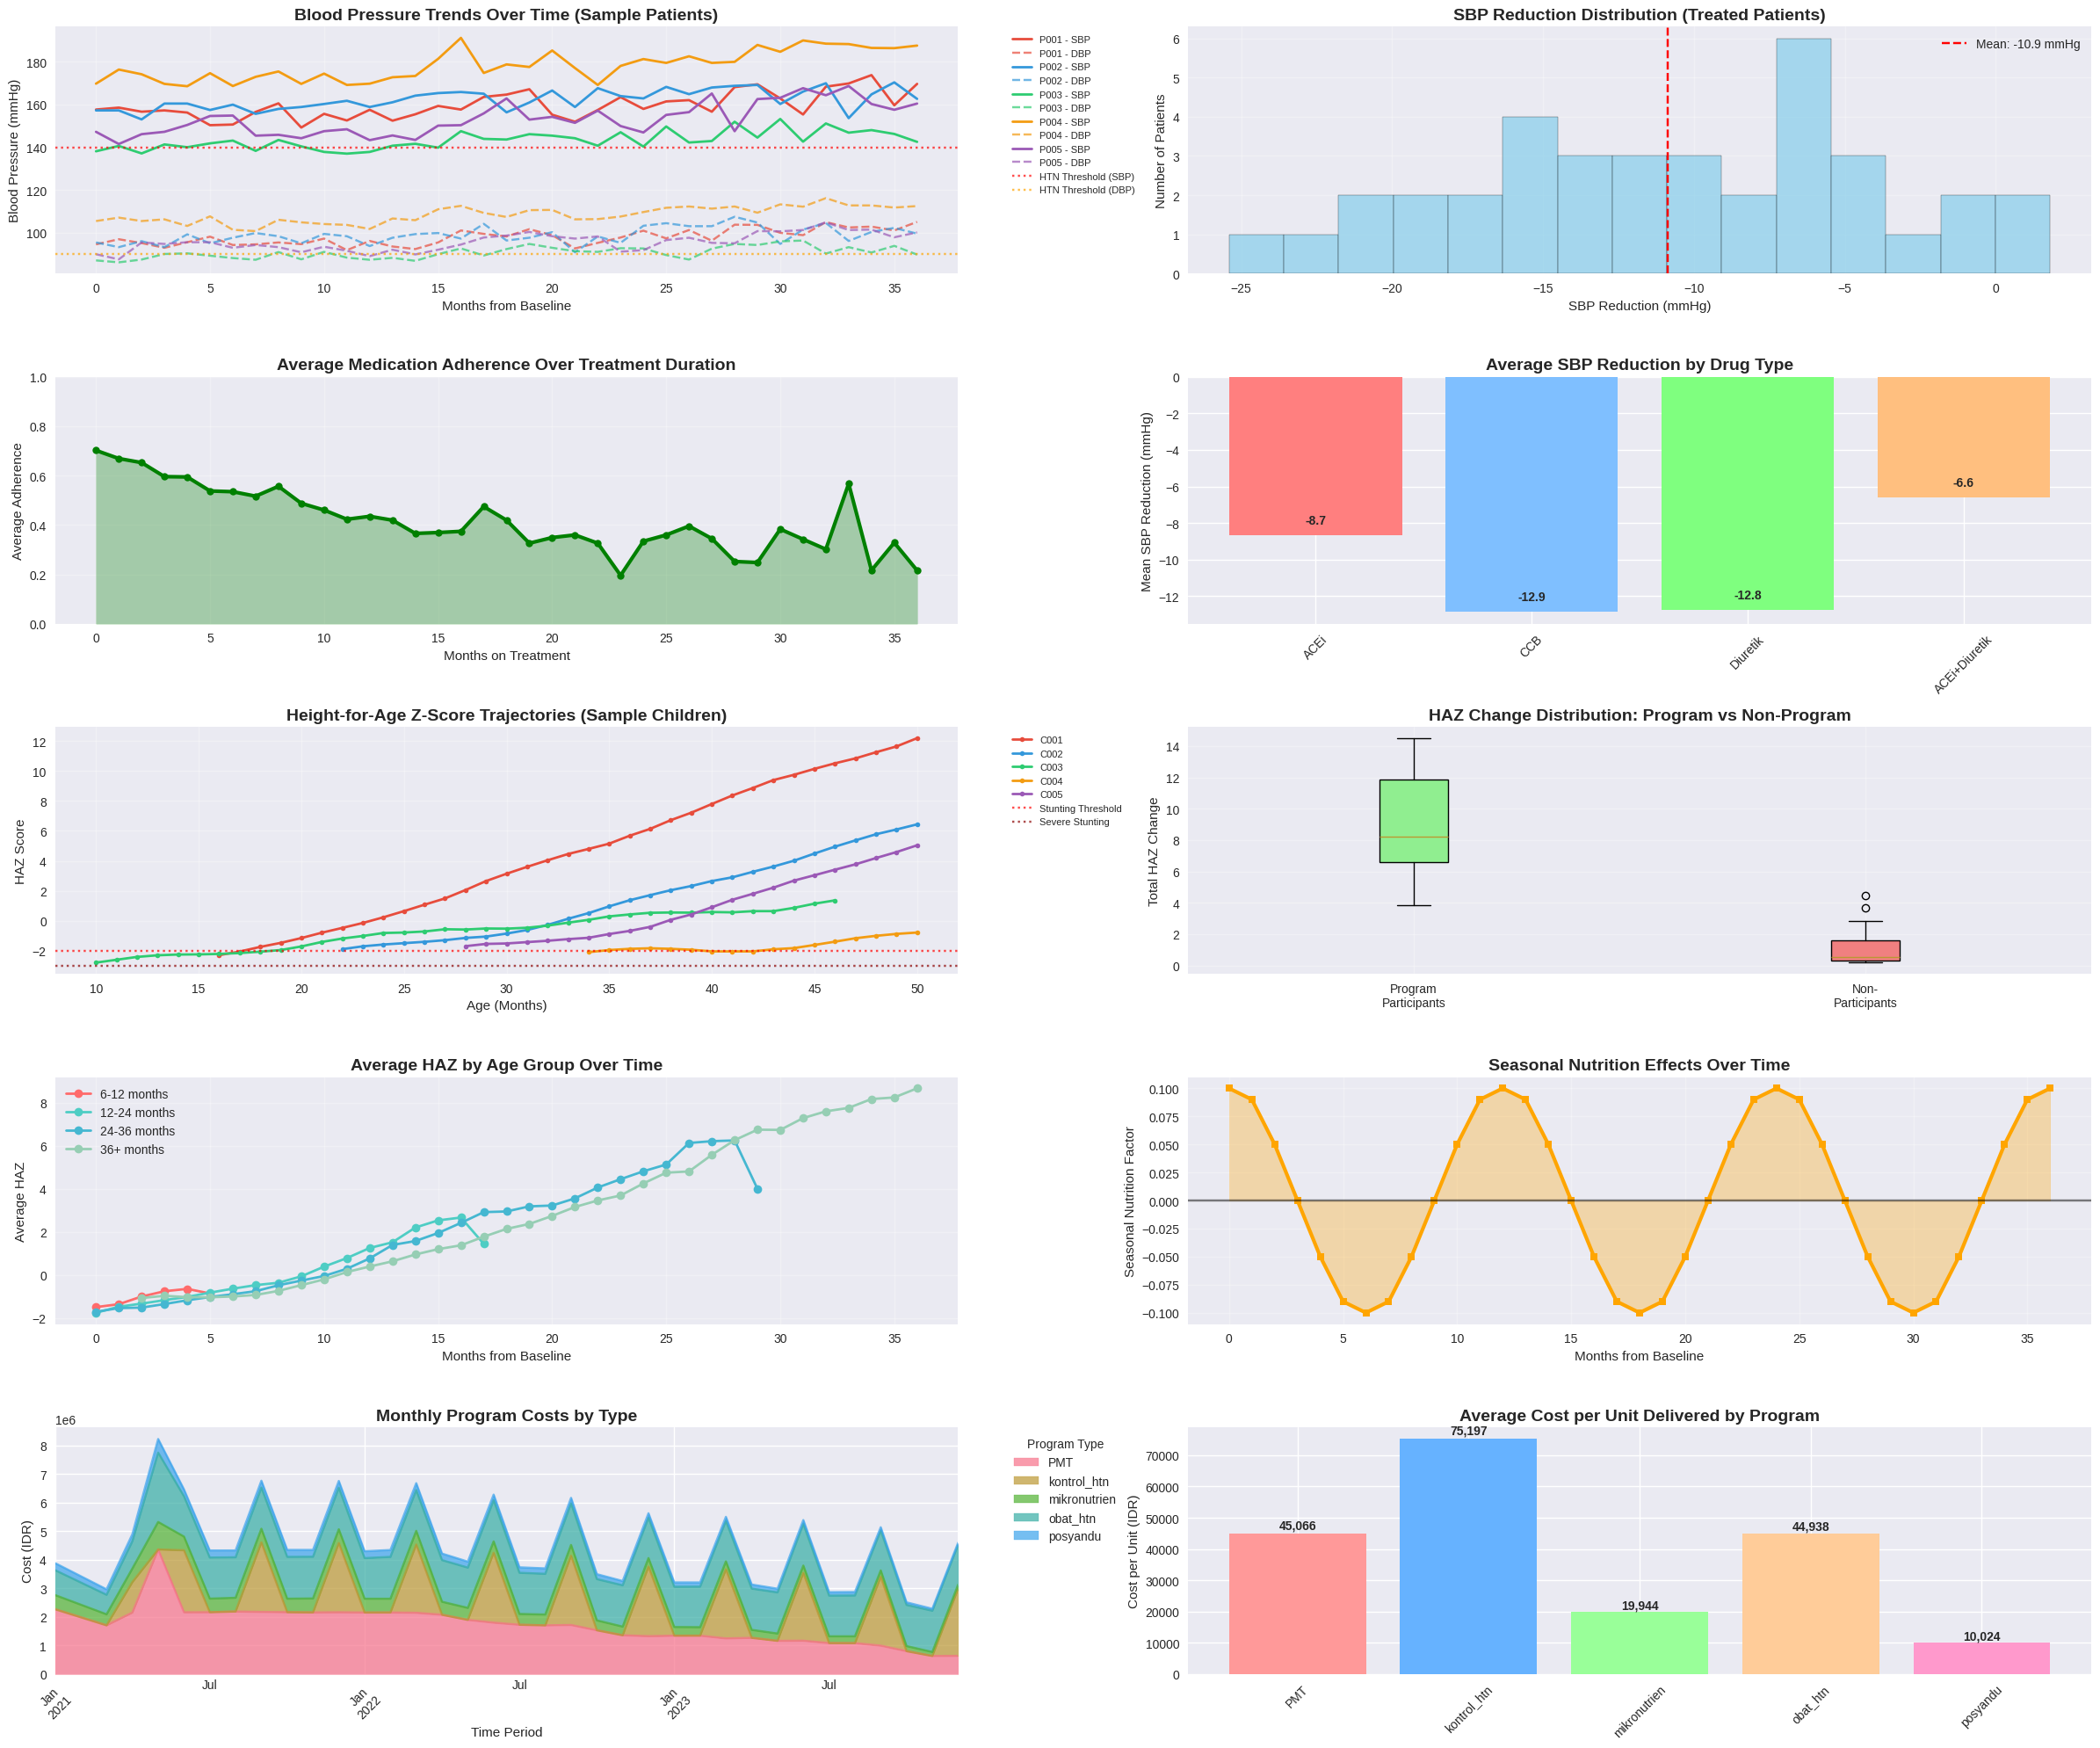


🎯 Creating Interactive Plotly Dashboards...



📈 LONGITUDINAL DATA SUMMARY:
📊 Adults HTN Dataset:
   Total records: 1,850
   Unique patients: 50
   Time span: 0-36 months
   Patients on treatment: 37

👶 Children Stunting Dataset:
   Total records: 1,155
   Unique children: 40
   Age range: 6-50 months
   Children in program: 29

💰 Program Log Dataset:
   Total delivery records: 3,459
   Total program cost: Rp 156,625,893
   Average monthly cost: Rp 4,233,132

✅ All visualizations completed successfully!


In [ ]:
# Add this as a new cell - Comprehensive Longitudinal Data Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime

## Comprehensive Longitudinal Data Visualizations

print("📊 Creating Comprehensive Visualizations for Longitudinal Data...")

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a comprehensive dashboard
fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(5, 4, height_ratios=[1, 1, 1, 1, 1], width_ratios=[1, 1, 1, 1])

# =============================================================================
# ADULTS HTN VISUALIZATIONS
# =============================================================================

# 1. Blood Pressure Trends Over Time (Top Row)
ax1 = fig.add_subplot(gs[0, :2])

# Sample 5 patients for clear visualization
sample_patients = adults_longitudinal['person_id'].unique()[:5]
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, patient in enumerate(sample_patients):
    patient_data = adults_longitudinal[adults_longitudinal['person_id'] == patient]
    ax1.plot(patient_data['month'], patient_data['sistol'], 
             label=f'{patient} - SBP', color=colors[i], linewidth=2)
    ax1.plot(patient_data['month'], patient_data['diastol'], 
             label=f'{patient} - DBP', color=colors[i], linestyle='--', alpha=0.7)

ax1.axhline(y=140, color='red', linestyle=':', alpha=0.7, label='HTN Threshold (SBP)')
ax1.axhline(y=90, color='orange', linestyle=':', alpha=0.7, label='HTN Threshold (DBP)')
ax1.set_title('Blood Pressure Trends Over Time (Sample Patients)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Months from Baseline')
ax1.set_ylabel('Blood Pressure (mmHg)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Treatment Response Distribution
ax2 = fig.add_subplot(gs[0, 2:])

# Calculate BP reduction for treated patients
treated_patients = adults_longitudinal[adults_longitudinal['on_treatment'] == 1]
if len(treated_patients) > 0:
    # Get latest BP for each treated patient
    latest_treated = treated_patients.groupby('person_id').last()
    baseline_treated = adults_longitudinal[adults_longitudinal['month'] == 0]
    baseline_treated = baseline_treated.set_index('person_id')
    
    bp_reductions = []
    for patient_id in latest_treated.index:
        if patient_id in baseline_treated.index:
            baseline_sbp = baseline_treated.loc[patient_id, 'sistol']
            latest_sbp = latest_treated.loc[patient_id, 'sistol']
            reduction = baseline_sbp - latest_sbp
            bp_reductions.append(reduction)
    
    if bp_reductions:
        ax2.hist(bp_reductions, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        ax2.axvline(x=np.mean(bp_reductions), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(bp_reductions):.1f} mmHg')
        ax2.set_title('SBP Reduction Distribution (Treated Patients)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('SBP Reduction (mmHg)')
        ax2.set_ylabel('Number of Patients')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

# 3. Adherence Decay Over Time
ax3 = fig.add_subplot(gs[1, :2])

adherence_data = adults_longitudinal[adults_longitudinal['on_treatment'] == 1]
if len(adherence_data) > 0:
    # Calculate mean adherence by treatment month
    adherence_by_month = adherence_data.groupby('treatment_months')['adherence_current'].mean()
    
    ax3.plot(adherence_by_month.index, adherence_by_month.values, 
             marker='o', linewidth=3, markersize=6, color='green')
    ax3.fill_between(adherence_by_month.index, adherence_by_month.values, 
                     alpha=0.3, color='green')
    ax3.set_title('Average Medication Adherence Over Treatment Duration', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Months on Treatment')
    ax3.set_ylabel('Average Adherence')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim([0, 1])

# 4. Treatment Effectiveness by Drug Type
ax4 = fig.add_subplot(gs[1, 2:])

drug_effectiveness = {}
for drug in adults_longitudinal['jenis_obat'].unique():
    if drug != '-':
        drug_patients = adults_longitudinal[adults_longitudinal['jenis_obat'] == drug]
        if len(drug_patients) > 0:
            # Calculate mean BP reduction for this drug
            latest_drug = drug_patients.groupby('person_id').last()
            baseline_drug = adults_longitudinal[adults_longitudinal['month'] == 0]
            baseline_drug = baseline_drug.set_index('person_id')
            
            reductions = []
            for patient_id in latest_drug.index:
                if patient_id in baseline_drug.index:
                    baseline_sbp = baseline_drug.loc[patient_id, 'sistol']
                    latest_sbp = latest_drug.loc[patient_id, 'sistol']
                    reduction = baseline_sbp - latest_sbp
                    reductions.append(reduction)
            
            if reductions:
                drug_effectiveness[drug] = np.mean(reductions)

if drug_effectiveness:
    drugs = list(drug_effectiveness.keys())
    effectiveness = list(drug_effectiveness.values())
    
    bars = ax4.bar(drugs, effectiveness, color=['#ff7f7f', '#7fbfff', '#7fff7f', '#ffbf7f'])
    ax4.set_title('Average SBP Reduction by Drug Type', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Mean SBP Reduction (mmHg)')
    ax4.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, effectiveness):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# =============================================================================
# CHILDREN STUNTING VISUALIZATIONS
# =============================================================================

# 5. HAZ Growth Trajectories
ax5 = fig.add_subplot(gs[2, :2])

# Sample 5 children for clear visualization
sample_children = children_longitudinal['child_id'].unique()[:5]

for i, child in enumerate(sample_children):
    child_data = children_longitudinal[children_longitudinal['child_id'] == child]
    ax5.plot(child_data['usia_bulan'], child_data['HAZ'], 
             label=f'{child}', color=colors[i], linewidth=2, marker='o', markersize=4)

ax5.axhline(y=-2, color='red', linestyle=':', alpha=0.7, label='Stunting Threshold')
ax5.axhline(y=-3, color='darkred', linestyle=':', alpha=0.7, label='Severe Stunting')
ax5.set_title('Height-for-Age Z-Score Trajectories (Sample Children)', fontsize=14, fontweight='bold')
ax5.set_xlabel('Age (Months)')
ax5.set_ylabel('HAZ Score')
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax5.grid(True, alpha=0.3)

# 6. Program Impact on HAZ
ax6 = fig.add_subplot(gs[2, 2:])

# Compare HAZ improvement between program participants and non-participants
program_children = children_longitudinal[children_longitudinal['on_program'] == 1]
non_program_children = children_longitudinal[children_longitudinal['on_program'] == 0]

if len(program_children) > 0 and len(non_program_children) > 0:
    # Calculate HAZ change for each group
    program_haz_change = program_children.groupby('child_id')['haz_change_this_month'].sum()
    non_program_haz_change = non_program_children.groupby('child_id')['haz_change_this_month'].sum()
    
    # Create box plot
    data_to_plot = [program_haz_change.values, non_program_haz_change.values]
    box_plot = ax6.boxplot(data_to_plot, labels=['Program\nParticipants', 'Non-\nParticipants'], 
                          patch_artist=True)
    
    # Color the boxes
    box_plot['boxes'][0].set_facecolor('lightgreen')
    box_plot['boxes'][1].set_facecolor('lightcoral')
    
    ax6.set_title('HAZ Change Distribution: Program vs Non-Program', fontsize=14, fontweight='bold')
    ax6.set_ylabel('Total HAZ Change')
    ax6.grid(True, alpha=0.3)

# 7. Age-specific Growth Patterns
ax7 = fig.add_subplot(gs[3, :2])

# Group children by age categories
age_groups = {
    '6-12 months': children_longitudinal[(children_longitudinal['usia_bulan'] >= 6) & 
                                        (children_longitudinal['usia_bulan'] < 12)],
    '12-24 months': children_longitudinal[(children_longitudinal['usia_bulan'] >= 12) & 
                                         (children_longitudinal['usia_bulan'] < 24)],
    '24-36 months': children_longitudinal[(children_longitudinal['usia_bulan'] >= 24) & 
                                         (children_longitudinal['usia_bulan'] < 36)],
    '36+ months': children_longitudinal[children_longitudinal['usia_bulan'] >= 36]
}

age_group_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, (age_group, data) in enumerate(age_groups.items()):
    if len(data) > 0:
        monthly_haz = data.groupby('month')['HAZ'].mean()
        ax7.plot(monthly_haz.index, monthly_haz.values, 
                label=age_group, color=age_group_colors[i], linewidth=2, marker='o')

ax7.set_title('Average HAZ by Age Group Over Time', fontsize=14, fontweight='bold')
ax7.set_xlabel('Months from Baseline')
ax7.set_ylabel('Average HAZ')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Seasonal Nutrition Effects
ax8 = fig.add_subplot(gs[3, 2:])

# Plot seasonal nutrition factor over time
seasonal_data = children_longitudinal.groupby('month')['seasonal_nutrition'].mean()

ax8.plot(seasonal_data.index, seasonal_data.values, 
         color='orange', linewidth=3, marker='s', markersize=6)
ax8.fill_between(seasonal_data.index, seasonal_data.values, 
                 alpha=0.3, color='orange')
ax8.set_title('Seasonal Nutrition Effects Over Time', fontsize=14, fontweight='bold')
ax8.set_xlabel('Months from Baseline')
ax8.set_ylabel('Seasonal Nutrition Factor')
ax8.grid(True, alpha=0.3)
ax8.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# =============================================================================
# PROGRAM LOG VISUALIZATIONS
# =============================================================================

# 9. Program Costs Over Time
ax9 = fig.add_subplot(gs[4, :2])

# Convert date column to datetime
program_log_corrected['tanggal'] = pd.to_datetime(program_log_corrected['tanggal'])

# Group costs by month and program type
program_log_corrected['year_month'] = program_log_corrected['tanggal'].dt.to_period('M')
monthly_costs = program_log_corrected.groupby(['year_month', 'program'])['biaya_riil'].sum().unstack(fill_value=0)

# Plot stacked area chart
if len(monthly_costs) > 0:
    monthly_costs.plot(kind='area', ax=ax9, alpha=0.7, stacked=True)
    ax9.set_title('Monthly Program Costs by Type', fontsize=14, fontweight='bold')
    ax9.set_xlabel('Time Period')
    ax9.set_ylabel('Cost (IDR)')
    ax9.legend(title='Program Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax9.tick_params(axis='x', rotation=45)

# 10. Program Delivery Efficiency
ax10 = fig.add_subplot(gs[4, 2:])

# Calculate cost per unit by program type
program_efficiency = program_log_corrected.groupby('program').agg({
    'biaya_riil': 'sum',
    'unit_terkirim': 'sum'
}).reset_index()

program_efficiency['cost_per_unit'] = program_efficiency['biaya_riil'] / program_efficiency['unit_terkirim']

bars = ax10.bar(program_efficiency['program'], program_efficiency['cost_per_unit'], 
                color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
ax10.set_title('Average Cost per Unit Delivered by Program', fontsize=14, fontweight='bold')
ax10.set_ylabel('Cost per Unit (IDR)')
ax10.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, program_efficiency['cost_per_unit']):
    height = bar.get_height()
    ax10.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{value:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# INTERACTIVE PLOTLY VISUALIZATIONS
# =============================================================================

print("\n🎯 Creating Interactive Plotly Dashboards...")

# Interactive Adults HTN Dashboard
fig_adults = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Blood Pressure Trends', 'Treatment Response Distribution',
                   'Adherence Over Time', 'Drug Effectiveness Comparison'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# BP Trends (Interactive)
for i, patient in enumerate(sample_patients[:3]):  # Limit to 3 for clarity
    patient_data = adults_longitudinal[adults_longitudinal['person_id'] == patient]
    fig_adults.add_trace(
        go.Scatter(x=patient_data['month'], y=patient_data['sistol'],
                  mode='lines+markers', name=f'{patient} SBP',
                  line=dict(color=colors[i], width=2)),
        row=1, col=1
    )

# Treatment Response Histogram
if bp_reductions:
    fig_adults.add_trace(
        go.Histogram(x=bp_reductions, nbinsx=15, name='BP Reduction',
                    marker_color='skyblue', opacity=0.7),
        row=1, col=2
    )

# Adherence Over Time
if len(adherence_data) > 0:
    fig_adults.add_trace(
        go.Scatter(x=adherence_by_month.index, y=adherence_by_month.values,
                  mode='lines+markers', name='Mean Adherence',
                  line=dict(color='green', width=3), marker=dict(size=8)),
        row=2, col=1
    )

# Drug Effectiveness
if drug_effectiveness:
    fig_adults.add_trace(
        go.Bar(x=list(drug_effectiveness.keys()), y=list(drug_effectiveness.values()),
              name='Drug Effectiveness', marker_color='orange'),
        row=2, col=2
    )

fig_adults.update_layout(height=800, title_text="Interactive Adults HTN Analysis Dashboard")
fig_adults.show()

# Interactive Children Dashboard
fig_children = make_subplots(
    rows=2, cols=2,
    subplot_titles=('HAZ Growth Trajectories', 'Program Impact Comparison',
                   'Age Group Patterns', 'Seasonal Effects'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# HAZ Trajectories
for i, child in enumerate(sample_children[:3]):
    child_data = children_longitudinal[children_longitudinal['child_id'] == child]
    fig_children.add_trace(
        go.Scatter(x=child_data['usia_bulan'], y=child_data['HAZ'],
                  mode='lines+markers', name=f'{child}',
                  line=dict(color=colors[i], width=2)),
        row=1, col=1
    )

# Program Impact
if len(program_children) > 0 and len(non_program_children) > 0:
    fig_children.add_trace(
        go.Box(y=program_haz_change.values, name='Program Participants',
              marker_color='lightgreen'),
        row=1, col=2
    )
    fig_children.add_trace(
        go.Box(y=non_program_haz_change.values, name='Non-Participants',
              marker_color='lightcoral'),
        row=1, col=2
    )

# Age Group Patterns
for i, (age_group, data) in enumerate(age_groups.items()):
    if len(data) > 0:
        monthly_haz = data.groupby('month')['HAZ'].mean()
        fig_children.add_trace(
            go.Scatter(x=monthly_haz.index, y=monthly_haz.values,
                      mode='lines+markers', name=age_group,
                      line=dict(color=age_group_colors[i], width=2)),
            row=2, col=1
        )

# Seasonal Effects
fig_children.add_trace(
    go.Scatter(x=seasonal_data.index, y=seasonal_data.values,
              mode='lines+markers', name='Seasonal Nutrition',
              line=dict(color='orange', width=3), fill='tonexty'),
    row=2, col=2
)

fig_children.update_layout(height=800, title_text="Interactive Children Stunting Analysis Dashboard")
fig_children.show()

# Program Costs Interactive Visualization
fig_costs = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Monthly Program Costs', 'Cost Efficiency by Program')
)

# Monthly costs stacked area
if len(monthly_costs) > 0:
    for program in monthly_costs.columns:
        fig_costs.add_trace(
            go.Scatter(x=monthly_costs.index.astype(str), y=monthly_costs[program],
                      mode='lines', name=program, stackgroup='one'),
            row=1, col=1
        )

# Cost efficiency
fig_costs.add_trace(
    go.Bar(x=program_efficiency['program'], y=program_efficiency['cost_per_unit'],
          name='Cost per Unit', marker_color='steelblue'),
    row=1, col=2
)

fig_costs.update_layout(height=600, title_text="Program Cost Analysis Dashboard")
fig_costs.show()

# Summary Statistics
print("\n📈 LONGITUDINAL DATA SUMMARY:")
print(f"📊 Adults HTN Dataset:")
print(f"   Total records: {len(adults_longitudinal):,}")
print(f"   Unique patients: {adults_longitudinal['person_id'].nunique()}")
print(f"   Time span: {adults_longitudinal['month'].min()}-{adults_longitudinal['month'].max()} months")
print(f"   Patients on treatment: {adults_longitudinal[adults_longitudinal['on_treatment']==1]['person_id'].nunique()}")

print(f"\n👶 Children Stunting Dataset:")
print(f"   Total records: {len(children_longitudinal):,}")
print(f"   Unique children: {children_longitudinal['child_id'].nunique()}")
print(f"   Age range: {children_longitudinal['usia_bulan'].min()}-{children_longitudinal['usia_bulan'].max()} months")
print(f"   Children in program: {children_longitudinal[children_longitudinal['on_program']==1]['child_id'].nunique()}")

print(f"\n💰 Program Log Dataset:")
print(f"   Total delivery records: {len(program_log_corrected):,}")
print(f"   Total program cost: Rp {program_log_corrected['biaya_riil'].sum():,.0f}")
print(f"   Average monthly cost: Rp {program_log_corrected.groupby('tanggal')['biaya_riil'].sum().mean():,.0f}")

print(f"\n✅ All visualizations completed successfully!")